In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import sys
from scipy import stats
sys.path.append("../src/seq_space_lib/")
import sequence_space_lib as seqsp

sys.path.append("../src/simulate_prot_evol_lib/")
import simulate_prot_evol_lib as simevol

pd.set_option('display.max_columns', None)

path='../data/'

In [3]:
#load datasets
vdfr=pd.read_csv(path+'vertebrates_summary.csv')
edfr=pd.read_csv(path+'enterobacterales_summary.csv')
gdfr=pd.read_csv(path+'gammaproteobacteria_summary.csv')
cdfr=pd.read_csv(path+'cogs_summary.csv')
sdfr=pd.read_csv(path+'simulated_summary.csv')

In [4]:
#print number of protein families in each
print(len(vdfr))
print(len(edfr))
print(len(gdfr))
print(len(cdfr))
print(len(sdfr))

12371
2465
2699
2517
4845


# Expected and effective dimension of natural and simulated seqeunces 

- Figure 3
- Figure 6D
- Figure S11

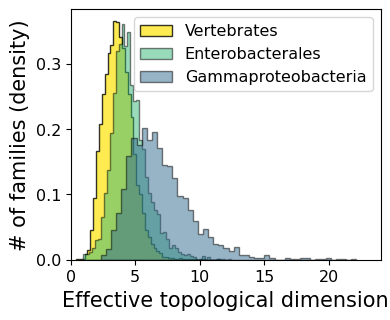

In [159]:

fig, ax=plt.subplots(figsize=(4,3.25))

ax.hist(vdfr['n_seq_from_dim_log20'], bins=50, alpha=0.8, density=True,  label='Vertebrates', color='#fde725', histtype = 'stepfilled', edgecolor='k')
ax.hist(edfr['n_seq_from_dim_log20'], bins=50, alpha=0.5, density=True,  label='Enterobacterales', color='#35b779', histtype = 'stepfilled', edgecolor='k')
ax.hist(gdfr['n_seq_from_dim_log20'], bins=50, alpha=0.5, density=True,  label='Gammaproteobacteria', color='#31688e', histtype = 'stepfilled', edgecolor='k')

ax.set_ylabel('# of families (density)', size=15)
ax.set_xlabel('Effective topological dimension', size=15)
ax.tick_params(axis='both', which='major', labelsize=11.5)
ax.set_xlim(0,24)

plt.legend(fontsize=11.5)

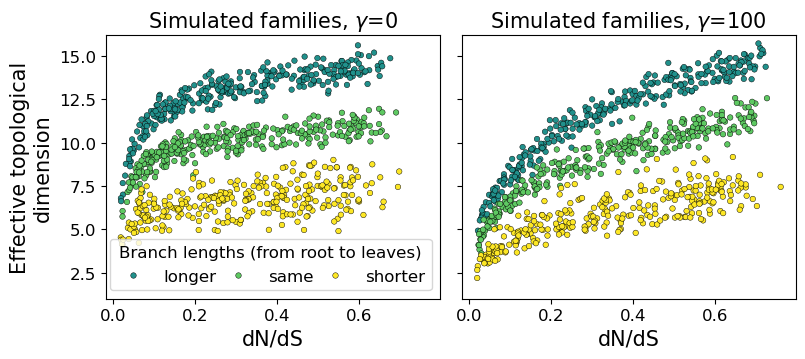

In [160]:
rundict={'longleaves':'longer', 'normal branch lengths':'same','shortleaves':'shorter', 'notree':'starlike tree'}
run_compr=[]
for i in sdfr['run']:
    run_compr.append(rundict[i])
sdfr['run_readable']=run_compr

fig, ax=plt.subplots(1,2,figsize=(8,3.7), sharex=True, sharey=True)
for ind, i in enumerate([0,100]):
    sns.scatterplot(sdfr[(sdfr['gamma']==i)&(sdfr['run'].isin(['longleaves', 'normal branch lengths', 'shortleaves']))], x='dnds_mean',
                 y='n_seq_from_dim_log20',ax=ax[ind], 
                 s=16, 
                 hue='run_readable', 
                 palette=['#21918c',  '#5ec962', '#fde725', ], edgecolor='k'
                 )
    ax[ind].set_title(r'Simulated families, $\gamma$='+str(i), size=15)
    ax[ind].set_ylim(1, 16.2)
    if ind!=0:
        ax[ind].set_ylabel('')
    else:
        ax[ind].set_ylabel('Effective topological\ndimension', size=15)
    if ind!=0:
        ax[ind].legend([], [], frameon=False)
    else:
        ax[ind].legend(title='Branch lengths (from root to leaves)', loc='lower right', ncol=3, fontsize=12, title_fontsize=12, columnspacing=0.3,)
    ax[ind].set_xlabel('dN/dS', size=15)


ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

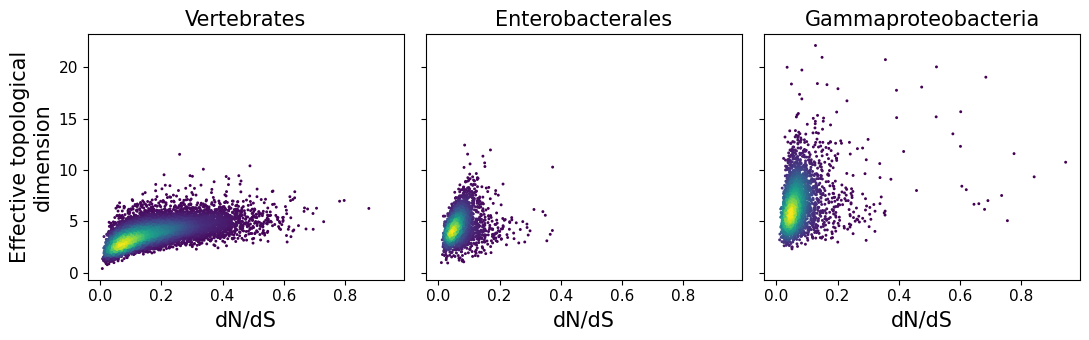

In [162]:
rundict={'longleaves':'longer from root to leaves', 'normal branch lengths':'no dependence on position','shortleaves':'shorter from root to leaves', 'notree':'star-like tree'}
run_compr=[]
for i in sdfr['run']:
    run_compr.append(rundict[i])
sdfr['run_readable']=run_compr

fig, ax=plt.subplots(1,3, figsize=(11,3.5),sharex=True, sharey=True)
names=['Gammaproteobacteria', 'Enterobacterales', 'Vertebrates']
names.reverse()

dfr=[gdfr, edfr, vdfr]
dfr.reverse()
for i in range(3):
    if i==0:
        ssize=1.2
    else:
        ssize=1.2
    seqsp.plot_density(dfr[i], '', 'dnds_mean', 
                 'n_seq_from_dim_log20', dropna=True, ax=ax[i], regline=False, size=ssize)
    ax[i].set_title(names[i], size=15)
    if i!=0:
        ax[i].set_ylabel('')
    else:
        ax[i].set_ylabel('Effective topological\ndimension', size=15)
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='both', which='major', labelsize=11)
    ax[i].set_xlabel('dN/dS', size=15)
plt.tight_layout()


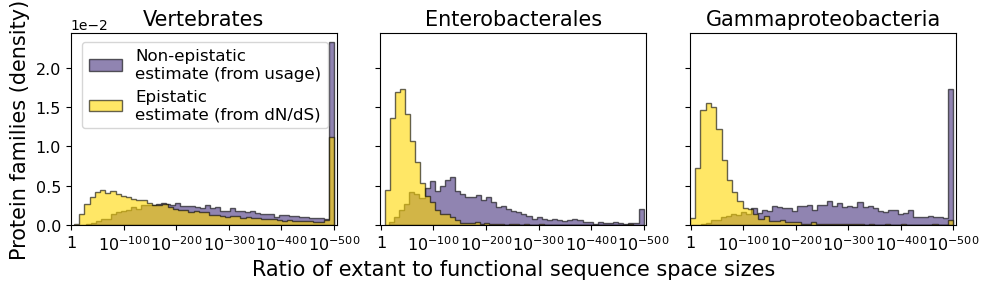

In [165]:
names=['Vertebrates', 'Enterobacterales', 'Gammaproteobacteria']
dffs=[gdfr, edfr, vdfr]
dffs.reverse()
fig, ax=plt.subplots(1,3, figsize=(10,3), sharex=True, 
                     sharey=True
                     )
for ind, (i, name) in enumerate(zip(dffs, names)):
    if ind==0:
        ylabel= 'Fraction of occupied \ndimensions (usage)'
    else:
        ylabel=''
    u_lim=[]
    d_lim=[]
    for kind, k in i.iterrows():
        if k['n_seq_diff_usage_log10']>=500:
            u_lim.append(500)
        else:
            u_lim.append(k['n_seq_diff_usage_log10'])
        if k['n_seq_diff_dnds_log10']>=500:
            d_lim.append(500)
        else:
            d_lim.append(k['n_seq_diff_dnds_log10'])
    i['n_seq_diff_usage_log10']=u_lim
    i['n_seq_diff_dnds_log10']=d_lim
    ax[ind].hist(i['n_seq_diff_usage_log10'], bins=50, alpha=0.6, density=True, label='Non-epistatic\nestimate (from usage)',color='#46327e', histtype = 'stepfilled', edgecolor='k')
    ax[ind].hist(i['n_seq_diff_dnds_log10'], bins=50, alpha=0.6, label='Epistatic\nestimate (from dN/dS)', density=True, color='gold',histtype = 'stepfilled', edgecolor='k')
    ax[ind].set_xticks([0,100,200,300,400,500]) 
    ax[ind].set_xticklabels([1]+[r'$10^{-%d}$' % x  for x in [100,200,300,400,500]])
    ax[ind].set_title(name, size=15)
    if ind==0:
        ax[ind].legend(fontsize=12)
    else:
        ax[ind].legend([], [], frameon=False) 
    ax[ind].set_xlim(-1,505)
    ax[ind].tick_params(axis='both', which='major', labelsize=11.5)
    ax[0].ticklabel_format(style='sci', axis='y', scilimits=(-2, 3))
    ax[1].set_xlabel('Ratio of extant to functional sequence space sizes', size=15)
    #plt.yscale('log')
ax[0].set_ylabel('Protein families (density)', size=15)
plt.tight_layout()
plt.show()

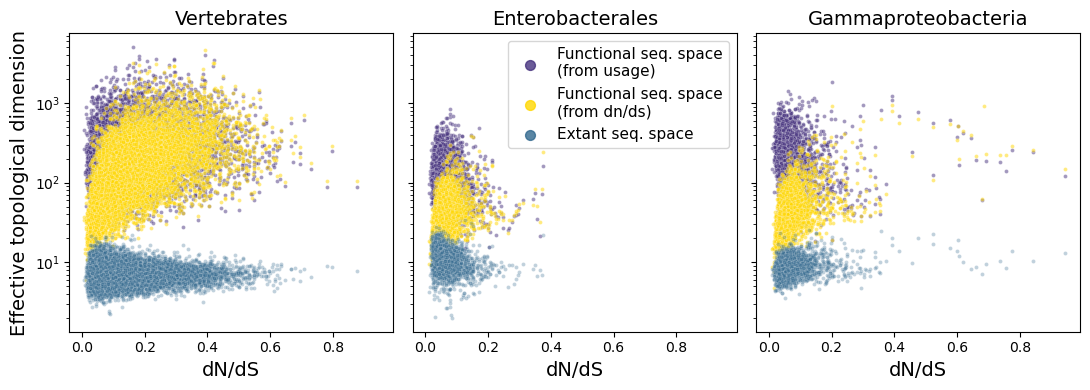

In [166]:
names=['Vertebrates', 'Enterobacterales', 'Gammaproteobacteria']

dffs=[gdfr, edfr, vdfr]
dffs.reverse()

colors=['#46327e', 'gold', '#31688e']

fig, ax=plt.subplots(1,3, figsize=(11,4), sharex=True, 
                     sharey=True
                     )
for ind, (i, name) in enumerate(zip(dffs, names)):
    sns.scatterplot(i, x='dnds_mean', y='n_seq_bin_expected_from_usage_log20', alpha=0.5, s=8, 
                    color=colors[0], label='Functional seq. space\n(from usage)', ax=ax[ind])
    sns.scatterplot(i, x='dnds_mean', y='n_seq_bin_expected_from_dn/ds_log20', alpha=0.5, s=8, 
                    color=colors[1], label='Functional seq. space\n(from dn/ds)', ax=ax[ind])
    sns.scatterplot(i, x='dnds_mean', y='n_seq_from_dim_log_alpha', alpha=0.3, s=8, 
                    color=colors[2], label='Extant seq. space', ax=ax[ind])
    #sns.scatterplot(i, x='dnds_mean', y='num_var_sites_less02gaps', alpha=0.3, s=8, label='number of variable sites', ax=ax[ind])
    #plt.xlim(-0.03, 0.8)
    ax[ind].set_ylabel('')
    ax[ind].set_title(name, size=14)
    ax[ind].set_yscale('log')
    ax[ind].set_xlabel('dN/dS', size=14)


ax[0].set_ylabel('Effective topological dimension', size=14)

# Remove legends from side panels
ax[0].legend([], [], frameon=False)
ax[2].legend([], [], frameon=False)

# Get labels in the order seaborn created them
handles, labels = ax[1].get_legend_handles_labels()

# Define colors used in scatterplots
legend_colors = [colors[0], colors[1], colors[2]]

# Create proxy markers ONLY for legend (s=200 is larger)
proxy_handles = [
    plt.scatter([], [], s=50, color=c, alpha=0.8)
    for c in legend_colors
]

ax[1].legend(proxy_handles, labels, fontsize=11, scatterpoints=1)
plt.tight_layout()

In [164]:
# statistics for DnaA protein 
edfr[edfr['OG_id']=='EntOG0152']

,OG_id,num_of_seq_aa_unique,ali_len,mean_seq_len_orig,median_seq_len_orig,num_invar_sites,num_invar_sites_less02gaps,num_invar_sites_less05gaps,num_invar_sites_no_gaps,num_var_sites,num_var_sites_less02gaps,num_var_sites_less05gaps,num_sites_less02gaps,num_sites_less05gaps,frac_var_sites_less02gaps,median_frac_gaps_per_site,mean_frac_gaps_per_site,mean_alphabet_size,mean_alphabet_size_less02gaps,mean_alphabet_size_less05gaps,median_alphabet_size,median_alphabet_size_less02gaps,median_alphabet_size_less05gaps,max_ld,mean_ld,median_ld,var_ld,dim_ur,dim_CI_ur,dim_R^2_ur,dim_range_end_ur,dim_range_start_ur,n_seq_from_dim_log10,n_seq_from_dim_log20,n_seq_from_dim_log_alpha,log10_nseq_ci,log20_nseq_ci,n_seq_bin_expected_from_dn/ds_log20,n_seq_bin_expected_from_usage_log20,n_seq_expected_from_dn/ds_log20,n_seq_expected_from_usage_log20,n_seq_diff_dnds_log10,n_seq_diff_dnds_log20,n_seq_diff_usage_log10,n_seq_diff_usage_log20,dnds_mean,dnds_median,dnds_var,dn_mean,dn_median,dn_var,ds_mean,ds_median,ds_var,filt_length,frac_NA,frac_SE_high,frac_dS<0.1,frac_dS>0.8,orig_length,dnds_from_usage,dnds_from_usage_sites80,dnds_from_usage_sites80_cons,dnds_from_usage_by_median_len,integral_b0,norm_integral_b0,COG,func_gr_all,func_gr,descr
142,EntOG0152,403,664,462.284,463.0,223,99,99,83,441,363,364,462,463,1.272727,0.0,0.304,3.401,4.067,4.086,2.0,3.0,3.0,0.58298,0.117434,0.103,0.003788,1.885,0.446,0.885,0.5,0.0,4.582877,3.522499,9.605268,1.084331,0.83344,40.064554,155.7519,-41.603787,169.794041,47.54231,36.542055,198.055016,152.229401,0.0382,0.0377,0.0011,0.022,0.0229,0.0002,0.5564,0.6198,0.0382,5188,0.0,0.001,0.0014,0.9446,97903,0.126368,0.161421,0.438143,74.737947,14.0088,29.3486,COG0593,L,L,"Replication, recombination and repair"


#  Effect of epistasis on the exploration of the sequence space and dimensionality of simulated sequences.

- Figure 4
- Figure S10
- Figure S7

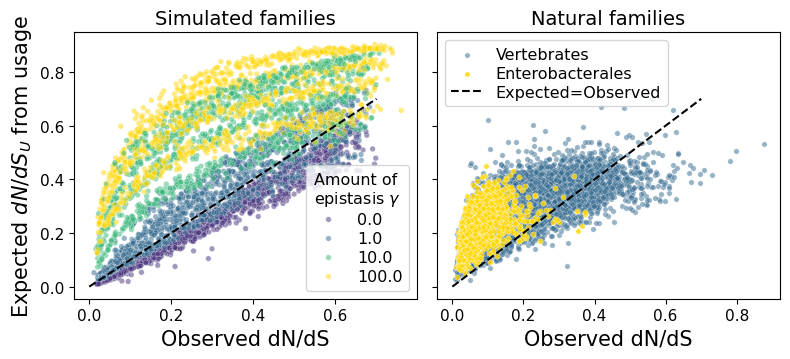

In [169]:
fig, ax=plt.subplots(1, 2, figsize=(8, 3.7), sharey=True, )

palette=['gold', '#35b779',  '#31688e', '#46327e']
palette.reverse()
pdict=dict(zip(sdfr.gamma.unique(), palette))

sns.scatterplot(sdfr, x='dnds_mean', y='dnds_from_usage', alpha=0.5, s=16,  hue='gamma', hue_norm=LogNorm(), palette=pdict, ax=ax[0], 
                #edgecolor='k'
                )
ax[0].plot([0,0.7],[0, 0.7],'--', c='black', 
            #label='x=y'
            )

ax[0].set_title('Simulated families', size=14)
ax[1].set_title('Natural families', size=14)

sns.scatterplot(vdfr, x='dnds_mean', y='dnds_from_usage_sites80', alpha=0.5, s=15, label='Vertebrates', ax=ax[1], c='#31688e', )
sns.scatterplot(edfr, x='dnds_mean', y='dnds_from_usage_sites80',  alpha=0.8, s=15, label='Enterobacterales', ax=ax[1], c='gold')
ax[1].plot([0,0.7],[0, 0.7],'--', c='black', label='Expected=Observed')
ax[1].legend(fontsize=11.5, labelspacing=0.25)
ax[0].legend(title='Amount of\nepistasis '+r'$\gamma$', fontsize=11.5, title_fontsize=11.5, labelspacing=0.25)
#ax[1].set_title('mean dnds from usage (u-1)/19\n sites with <0.2 gaps')
ax[0].set_ylabel(r'Expected $dN/dS_U$ from usage', size=15)
ax[1].set_xlabel('Observed dN/dS', size=15)
ax[0].set_xlabel('Observed dN/dS', size=15)

ax[0].tick_params(axis='both', which='major', labelsize=11)
ax[1].tick_params(axis='both', which='major', labelsize=11)


plt.tight_layout()



/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/1786132761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)
/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/1786132761.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cynall["Fraction of allowed substitutions"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=T

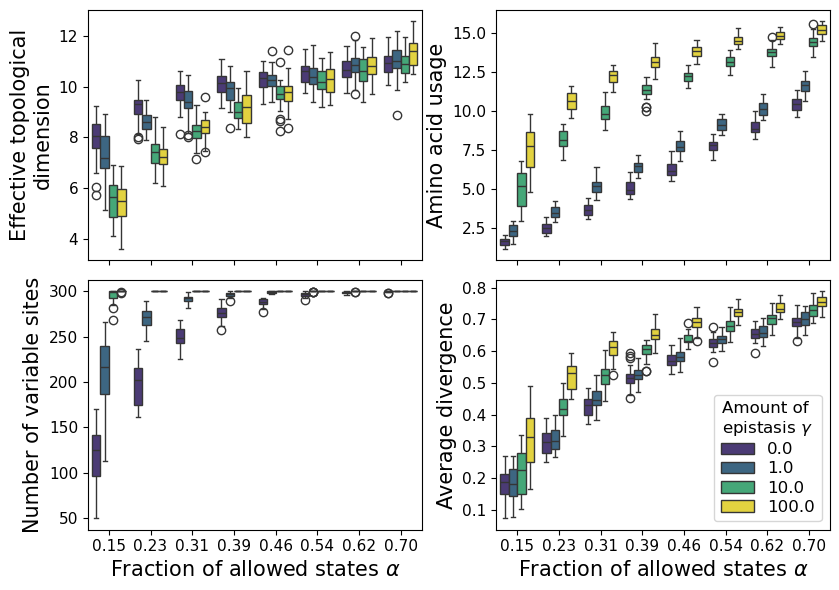

In [170]:

cynall=sdfr[(sdfr['run']=='normal branch lengths') ]

#bin f-values for boxplots
num_bins=8
cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)

# Create labels using min and max values
bin_labels = [f"{bin_edges[i+1]:.2f}" for i in range(len(bin_edges) - 1)]
#bin_labels = [f"{bin_edges[i]:.2f}-\n{bin_edges[i+1]:.2f}" for i in range(len(bin_edges) - 1)]

# Assign bin labels
cynall["Fraction of allowed substitutions"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=True)


palette=['#fde725', '#35b779',  '#31688e', '#46327e']
palette.reverse()
pdict=dict(zip(cynall.gamma.unique(), palette))

fig, ax=plt.subplots(2, 2, figsize=(8.5, 6), sharex=True)
ylabels=['Effective topological\ndimension','Amino acid usage', 'Number of variable sites', 'Average divergence']
for ind, i in enumerate(['n_seq_from_dim_log20', 'mean_alphabet_size', 'num_var_sites', 'mean_ld' ]):
    sns.boxplot(cynall, y=i, x="Fraction of allowed substitutions", 
                hue='gamma', hue_norm=LogNorm(), palette=pdict, ax=ax[ind//2, ind%2]
               )
    ax[ind//2, ind%2].set_ylabel(ylabels[ind], size=15)
    ax[1, ind%2].set_xlabel(r'Fraction of allowed states $\alpha$', size=15)
    ax[ind//2, ind%2].tick_params(axis='both', which='major', labelsize=11)
    if ind!=3:
        ax[ind//2, ind%2].legend([],[], frameon=False)
    else:
        ax[ind//2 , ind%2].legend(title='Amount of\nepistasis '+r'$\gamma$', title_fontsize=12, fontsize=12, labelspacing=0.25)


#fig.suptitle('Effect of epistasis on sequences simulated on a random tree', fontsize=14)
plt.tight_layout()

/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/640649493.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0, 3].legend(title='Amount of\nepistasis '+r'$\gamma$', labelspacing=0.25)
/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/640649493.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0, 3].legend(title='Amount of\nepistasis '+r'$\gamma$', labelspacing=0.25)
/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/640649493.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0, 3].legend(title='Amount of\nepistasis '+r'$\gamma$', labelspacing=0.25)


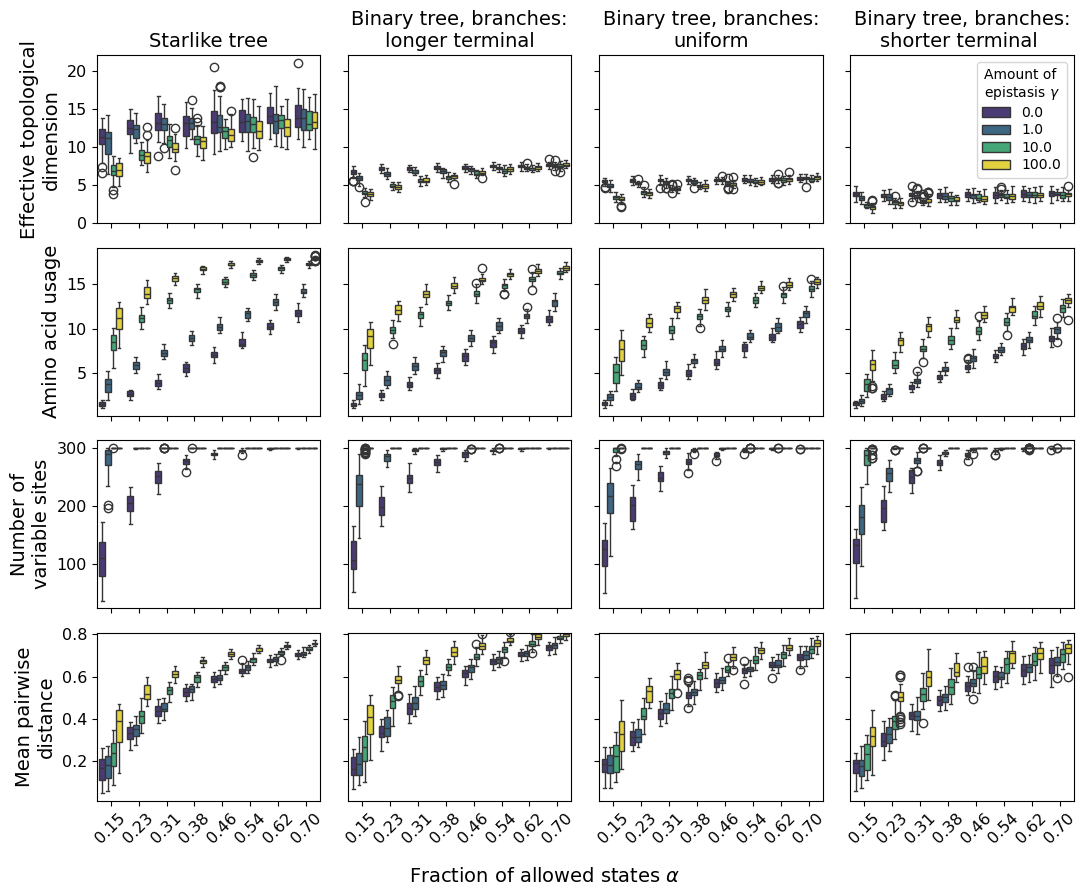

In [171]:
cynall=sdfr

#bin f-values for boxplots
num_bins=8
cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)

# Create labels using min and max values
bin_labels = [f"{bin_edges[i+1]:.2f}" for i in range(len(bin_edges) - 1)]

# Assign bin labels
cynall["fraction_allowed_subs_binned"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=True)


palette=['#fde725', '#35b779',  '#31688e', '#46327e']
palette.reverse()
pdict=dict(zip(cynall.gamma.unique(), palette))

fig, ax=plt.subplots(4, 4, figsize=(11, 9), sharex=True)

collabels=[
    "Starlike tree",
    "Binary tree, branches:\nlonger terminal",
    "Binary tree, branches:\nuniform",
    "Binary tree, branches:\nshorter terminal ",
]

for ind, i in enumerate(['notree', 'longleaves', 'normal branch lengths',  'shortleaves']):
    sns.boxplot(cynall[cynall['run']==i], y='dim_ur', x='fraction_allowed_subs_binned', 
                hue='gamma', hue_norm=LogNorm(), palette=pdict, ax=ax[0, ind]
               )
    ax[0, ind].set_title(collabels[ind], size=14)
    ax[0, 0].legend([],[], frameon=False)
    ax[0, 1].legend([],[], frameon=False)
    ax[0, 2].legend([],[], frameon=False)
    ax[0, ind].set_ylim(0,22)
    ax[0, 3].legend(title='Amount of\nepistasis '+r'$\gamma$', labelspacing=0.25)

for ind, i in enumerate(['notree', 'longleaves', 'normal branch lengths',  'shortleaves']):
    sns.boxplot(cynall[cynall['run']==i], y='mean_alphabet_size', x='fraction_allowed_subs_binned', 
                hue='gamma', hue_norm=LogNorm(), palette=pdict,  ax=ax[1, ind]
               )
    ax[1, ind].legend([],[], frameon=False)
for ind, i in enumerate(['notree', 'longleaves', 'normal branch lengths',  'shortleaves']):
    sns.boxplot(cynall[cynall['run']==i], y='num_var_sites', x='fraction_allowed_subs_binned', 
                hue='gamma', hue_norm=LogNorm(), palette=pdict,  ax=ax[2, ind]
               )
    #ax[1, ind].set_title(i)
    ax[2, ind].legend([],[], frameon=False)

for ind, i in enumerate(['notree', 'longleaves', 'normal branch lengths',  'shortleaves']):
    sns.boxplot(cynall[cynall['run']==i], y='mean_ld', x='fraction_allowed_subs_binned', 
                hue='gamma', hue_norm=LogNorm(), palette=pdict,  ax=ax[3, ind]
               )
    ax[3, ind].legend([],[], frameon=False)
    ax[3,ind].set_xlabel('')
    ax[3,ind].tick_params(axis='x', which='major', labelsize=11.5, labelrotation=45)

for ind, i in enumerate(['Effective topological\ndimension','Amino acid usage', 'Number of\nvariable sites', 'Mean pairwise\ndistance']):
    ax[ind, 0].set_ylabel(i, size=14)
    ax[ind, 0].tick_params(axis='y', which='major', labelsize=11.5)

fig.supxlabel(r'Fraction of allowed states $\alpha$', fontsize=14)

for row in range(4):
    for col in range(1, 4):  # share with the first column in the same row
        ax[row, col].sharey(ax[row, 0])
        ax[row, col].tick_params(labelleft=False)
        if col!=0:
            ax[row, col].set_ylabel('')
    

plt.tight_layout()

## Epistasis introduces clustering in the extant phylogeny-evolved sequence distribution - Figure S7

/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_6865/1390314944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)
/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_6865/1390314944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cynall["Fraction of allowed substitutions"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=Tru

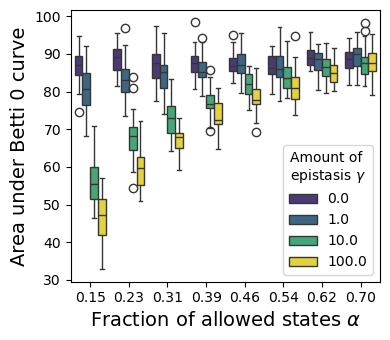

In [5]:

cynall=sdfr[(sdfr['run']=='normal branch lengths') ]

#bin f-values for boxplots
num_bins=8
cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)

# Create labels using min and max values
bin_labels = [f"{bin_edges[i+1]:.2f}" for i in range(len(bin_edges) - 1)]

# Assign bin labels
cynall["Fraction of allowed substitutions"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=True)

palette=['#fde725', '#35b779',  '#31688e', '#46327e']
palette.reverse()
pdict=dict(zip(cynall.gamma.unique(), palette))


fig, ax=plt.subplots( figsize=(4, 3.5), )
sns.boxplot(cynall, y='norm_integral_b0', x="Fraction of allowed substitutions", 
                hue='gamma', hue_norm=LogNorm(), palette=pdict, ax=ax
               )
ax.set_ylabel('Area under Betti 0 curve', size=14)
ax.set_xlabel(r'Fraction of allowed states $\alpha$', size=14)
ax.legend(title='Amount of\nepistasis '+r'$\gamma$')

#fig.suptitle('Effect of epistasis on sequences simulated on a random tree', fontsize=14)
fig.tight_layout()



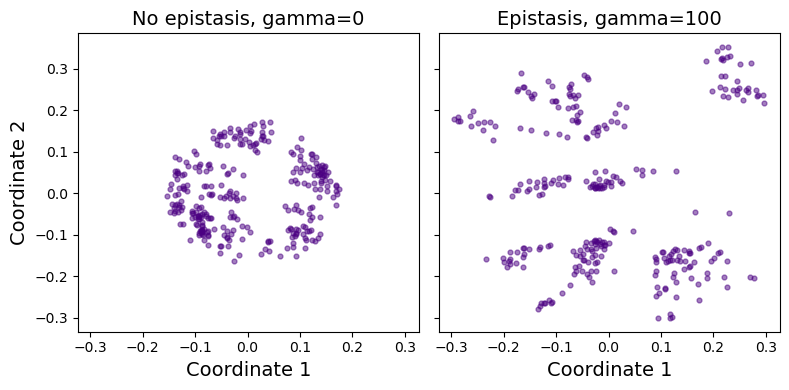

In [173]:

fig, ax=plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)
matrpath='../data/examples/'
transforms=[]
for ind, i in enumerate(['SimuOG8862','SimuOG10371']):
    out, transform=seqsp.MDS_graph(matrpath+i+'.pdistm')
    transforms.append(transform)
    ax[ind].cla()
    ax[ind].scatter(transform[:,0],  transform[:,1], alpha=0.5, c='indigo', s=12)
    ax[ind].set_xlabel('Coordinate 1', size=14)
ax[0].set_title('No epistasis, gamma=0', size=14)
ax[1].set_title('Epistasis, gamma=100', size=14) 
ax[0].set_ylabel('Coordinate 2', size=14)
plt.tight_layout()


# Impact of phylogenetic tree topology on dimensionality.

- Figure 5A

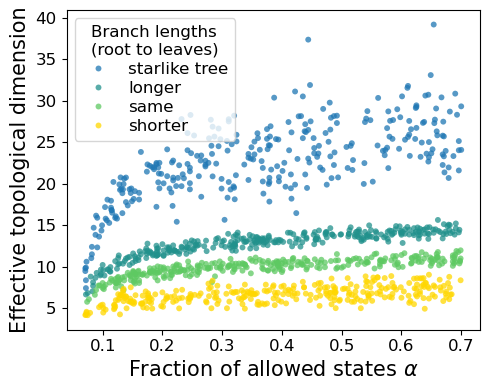

In [174]:
rundict={'longleaves':'longer', 'normal branch lengths':'same','shortleaves':'shorter', 'notree':'starlike tree'}
run_compr=[]
for i in sdfr['run']:
    run_compr.append(rundict[i])
sdfr['run_readable']=run_compr

order = [
    "starlike tree",
    "longer",
    "same",
    "shorter"
]


fig, ax=plt.subplots(figsize=(5, 4))

sns.scatterplot(sdfr[sdfr['gamma']==0], x='fraction_allowed_subs', y='n_seq_from_dim_log20', hue='run_readable',  
                s=18, alpha=0.75, ax=ax, hue_order=order, palette=['tab:blue',  '#21918c',  '#5ec962', 'gold', ],                 
                edgecolor='none', linewidth=0.1,
                )

ax.legend(title='Branch lengths\n(root to leaves)',  fontsize=12, title_fontsize=12, labelspacing=0.25
          )
ax.set_ylabel('Effective topological dimension', size=15)
ax.set_xlabel(r'Fraction of allowed states $\alpha$', size=15)
ax.tick_params(axis='both', which='major', labelsize=12)

fig.tight_layout()

# Natural sequences - datasets' details

- Figure S8
- Figure S4B
- Figure S6

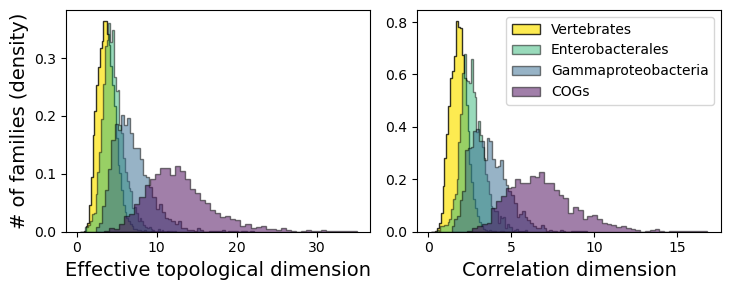

In [175]:

fig, ax=plt.subplots(1, 2 , figsize=(7.5,3))

ax[0].hist(vdfr['n_seq_from_dim_log20'], bins=50, alpha=0.8, density=True,  label='Vertebrates', color='#fde725', histtype = 'stepfilled', edgecolor='k')
ax[0].hist(edfr['n_seq_from_dim_log20'], bins=50, alpha=0.5, density=True,  label='Enterobacterales', color='#35b779', histtype = 'stepfilled', edgecolor='k')
ax[0].hist(gdfr['n_seq_from_dim_log20'], bins=50, alpha=0.5, density=True,  label='Gammaproteobacteria', color='#31688e', histtype = 'stepfilled', edgecolor='k')
ax[0].hist(cdfr['n_seq_from_dim_log20'], bins=50, alpha=0.5, density=True, label='COGs', color='#440154',  histtype = 'stepfilled', edgecolor='k')

ax[1].hist(vdfr['dim_ur'], bins=50, alpha=0.8, density=True,  label='Vertebrates', color='#fde725', histtype = 'stepfilled', edgecolor='k')
ax[1].hist(edfr['dim_ur'], bins=50, alpha=0.5, density=True,  label='Enterobacterales', color='#35b779', histtype = 'stepfilled', edgecolor='k')
ax[1].hist(gdfr['dim_ur'], bins=50, alpha=0.5, density=True,  label='Gammaproteobacteria', color='#31688e', histtype = 'stepfilled', edgecolor='k')
ax[1].hist(cdfr['dim_ur'], bins=50, alpha=0.5, density=True, label='COGs', color='#440154',  histtype = 'stepfilled', edgecolor='k')

ax[1].set_xlabel('Correlation dimension', size=14)

ax[0].set_ylabel('# of families (density)', size=14)
ax[0].set_xlabel('Effective topological dimension', size=14)

plt.tight_layout()
#ax[0].set_ylabel('Density')
#plt.suptitle('Dimensionality of protein families')
#ax[0].legend(fontsize=11)
ax[1].legend(fontsize=10)

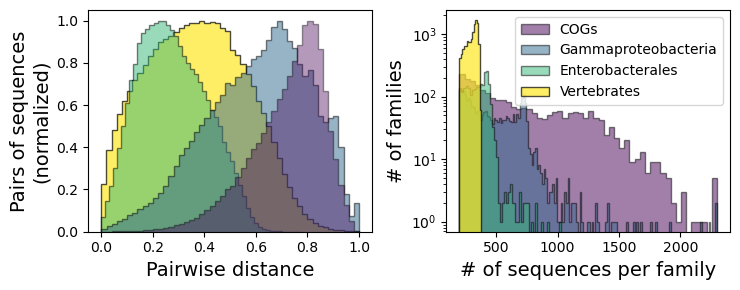

In [183]:
with open(path+'distances/pdistm_matrices_unique_num_of_seq_col_200_seqs_or_more_wo_folder_5_pairs_hist.pickle', 'rb') as vf:
    vert=pickle.load(vf)
with open(path+'distances/enterobacterales_2604_pdistm_200seqs_5_pairs_hist.pickle', 'rb') as ef:
    ent=pickle.load(ef)
with open(path+'distances/egnogg_gamma_raw_pdistm_matrices_all_wo_folder_5_pairs_hist.pickle', 'rb') as gf:
    gam=pickle.load(gf)
with open(path+'distances/pairali_done12112025_wpath_5_pairs_hist.pickle', 'rb') as cf:
    cog=pickle.load(cf)

plt.close('all')

fig, ax=plt.subplots(1, 2 , figsize=(7.5,3))

ax[0].stairs(vert[0]/max(vert[0]), vert[1], fill=True, alpha=0.7, label='Vertebrates', color='#fde725',  edgecolor='k', linewidth=1.0)
ax[0].stairs(ent[0]/max(ent[0]), ent[1], fill=True, alpha=0.5, label='Enterobacterales', color='#35b779', edgecolor='k', linewidth=1.0   )
ax[0].stairs(gam[0]/max(gam[0]), gam[1], fill=True, alpha=0.5, label='Gammaproteobacteria', color='#31688e', edgecolor='k', linewidth=1.0)
ax[0].stairs(cog[0]/max(cog[0]), cog[1], fill=True, alpha=0.4, label='Gammaproteobacteria', color='#440154',edgecolor='k', linewidth=1.0)


ax[1].hist(np.minimum(cdfr['num_of_seq_aa_unique'], 2300), bins=50, alpha=0.5, density=False, label='COGs', color='#440154', histtype='stepfilled', edgecolor='k')
ax[1].hist(np.minimum(gdfr['num_of_seq_aa_unique'], 2300), bins=150, alpha=0.5, density=False, label='Gammaproteobacteria', color='#31688e', histtype='stepfilled', edgecolor='k')
ax[1].hist(edfr['num_of_seq_aa_unique'], bins=50, alpha=0.5,  density=False, label='Enterobacterales', color='#35b779', histtype='stepfilled', edgecolor='k')
ax[1].hist(vdfr['num_of_seq_aa_unique'], bins=15, alpha=0.7,  density=False, label='Vertebrates', color='#fde725', histtype='stepfilled', edgecolor='k')

ax[0].set_ylabel('Pairs of sequences\n(normalized)', size=14)
ax[0].set_xlabel('Pairwise distance', size=14)

ax[1].set_xlabel('# of sequences per family', size=14)
ax[1].set_ylabel('# of families', size=14)
#ax[1].set_xlim(175,2300)
ax[1].set_yscale('log')
ax[1].legend(fontsize=10)    

plt.tight_layout()

#plt.savefig('pdist_samples_5_perc_200_seqs_and_more_all_datasets_vert_ent_gam.png', dpi=300)

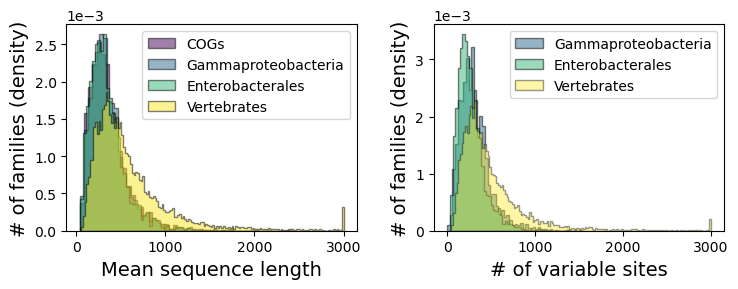

In [177]:

fig, ax=plt.subplots(1, 2 , figsize=(7.5,3))

ax[0].hist(cdfr['mean_seq_len_orig'], bins=50, alpha=0.5, density=True, label='COGs', color='#440154', histtype='stepfilled', edgecolor='k')
ax[0].hist(gdfr['mean_seq_len_orig'], bins=50, alpha=0.5, density=True, label='Gammaproteobacteria', color='#31688e', histtype='stepfilled', edgecolor='k')
ax[0].hist(edfr['mean_seq_len_orig'], bins=50, alpha=0.5,  density=True, label='Enterobacterales', color='#35b779', histtype='stepfilled', edgecolor='k')
ax[0].hist(np.minimum(vdfr['mean_seq_len_orig'], 3000), bins=150, alpha=0.5,  density=True, label='Vertebrates', color='#fde725', histtype='stepfilled', edgecolor='k')

ax[0].set_ylabel('# of families (density)', size=14)
ax[0].set_xlabel('Mean sequence length', size=14)
ax[0].legend(fontsize=10)
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(-2, 3))

ax[1].hist(gdfr['num_var_sites_less02gaps'], bins=50, alpha=0.5, density=True, label='Gammaproteobacteria', color='#31688e', histtype='stepfilled', edgecolor='k')
ax[1].hist(edfr['num_var_sites_less02gaps'], bins=50, alpha=0.5,  density=True, label='Enterobacterales',color='#35b779', histtype='stepfilled', edgecolor='k')
ax[1].hist(np.minimum(vdfr['num_var_sites_less02gaps'], 3000), bins=150, alpha=0.4,  density=True, label='Vertebrates', color='#fde725', histtype='stepfilled', edgecolor='k')

ax[1].set_ylabel('# of families (density)', size=14)
ax[1].set_xlabel('# of variable sites', size=14)
ax[1].legend()
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(-2, 3))

plt.tight_layout()


/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/4171363126.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[ind//2, ind%2].legend(title=r'$\rho$:'+'{:.2f}, p-value:{:.1e}'.format(rho, pval), title_fontsize=12)


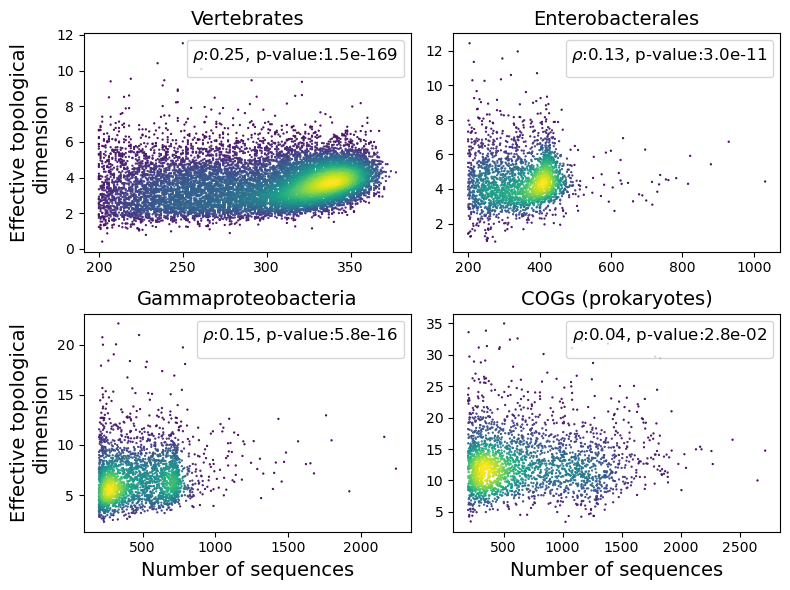

In [179]:


fig, ax=plt.subplots(2, 2, figsize=(8, 6), 
                     )
ylabels=[
    'Vertebrates', 'Enterobacterales', 'Gammaproteobacteria', 'COGs (prokaryotes)'
]
for ind, i in enumerate([vdfr, edfr, gdfr[gdfr['num_of_seq_aa_unique']<2500], cdfr]):
    seqsp.plot_density(i['num_of_seq_aa_unique'], i['n_seq_from_dim_log20'],
                       'Number of sequences', 'Effective topological dimension', dropna=False, regline=False,ax=ax[ind//2, ind%2])

    ax[ind//2, ind%2].set_title(ylabels[ind], size=14)
    ax[ind//2, 0].set_ylabel('Effective topological\ndimension', size=14)
    ax[ind//2, 1].set_ylabel('', size=12)
    ax[ind//2, ind%2].set_xlabel('Number of sequences', size=14)
    ax[0, ind%2].set_xlabel('', size=14)
    rho, pval=stats.spearmanr(i['num_of_seq_aa_unique'], i['n_seq_from_dim_log20'])
    ax[ind//2, ind%2].legend(title=r'$\rho$:'+'{:.2f}, p-value:{:.1e}'.format(rho, pval), title_fontsize=12)

#fig.suptitle('Effect of epistasis on sequences simulated on a random tree', fontsize=14)
fig.tight_layout()


/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/1498414376.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[ind//2, ind%2].legend(title=r'$\rho$:'+'{:.2f}, p-value:{:.1e}'.format(rho, pval), title_fontsize=12)


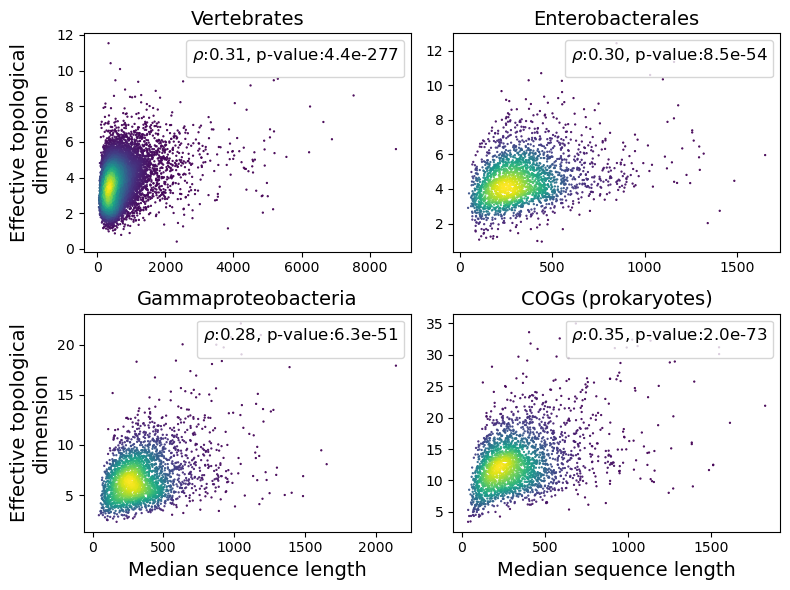

In [186]:

fig, ax=plt.subplots(2, 2, figsize=(8, 6), 
                     #sharey=True
                     )
ylabels=[
    'Vertebrates', 'Enterobacterales', 'Gammaproteobacteria', 'COGs (prokaryotes)'
]
for ind, i in enumerate([vdfr, edfr, gdfr, cdfr]):
    seqsp.plot_density(i['median_seq_len_orig'], i['n_seq_from_dim_log20'],
                       'Median sequence length', 'Effective topological dimension', dropna=False, regline=False,ax=ax[ind//2, ind%2])

    ax[ind//2, ind%2].set_title(ylabels[ind], size=14)
    ax[ind//2, 0].set_ylabel('Effective topological\ndimension', size=14)
    ax[ind//2, 1].set_ylabel('', size=12)
    ax[ind//2, ind%2].set_xlabel('Median sequence length', size=14)
    ax[0, ind%2].set_xlabel('', size=14)
    rho, pval=stats.spearmanr(i['median_seq_len_orig'], i['n_seq_from_dim_log20'])
    ax[ind//2, ind%2].legend(title=r'$\rho$:'+'{:.2f}, p-value:{:.1e}'.format(rho, pval), title_fontsize=12)

#fig.suptitle('Effect of epistasis on sequences simulated on a random tree', fontsize=14)
fig.tight_layout()

# Simulations of sequence evolution - dataset details 

Figure S9
Figure S12
Figure S13

## Phylogenetic trees - Figure S9

In [2]:
from ete3 import Tree, TreeStyle, TextFace, add_face_to_node
#initialize ete3 rendering
ts = TreeStyle()
ts.show_leaf_name = False
def my_layout(node):
    if node.is_leaf():
        F = TextFace(node.name, tight_text=True)
        add_face_to_node(F, node, column=0, position="branch-right")
ts.layout_fn = my_layout

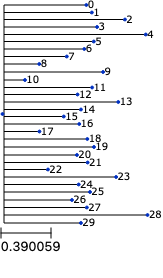

In [ ]:
#starlike tree
n_leaves=30
simtree_star=simevol.simulate_tree_with_depth_scaled_branch_lengths(n_leaves, starlike_limit='gammaFitAll', starlike=True)
simtree_star.render("%%inline", tree_style=ts)

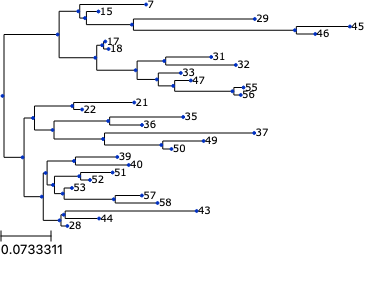

In [ ]:
#original way, the branch length are +- the same lenth along the tree - 
# from exp distribution with rate = 0.0539 (estimated from Ensembl trees)
# no branch length dependence on the distance from root
n_leaves = 30
scale_factor = 0  # Scale factor to reduce lengths with depth
length_scale=1
simtree = simevol.simulate_tree_with_depth_scaled_branch_lengths(n_leaves, scale_factor, length_scale=length_scale)
simtree.render("%%inline", tree_style=ts)

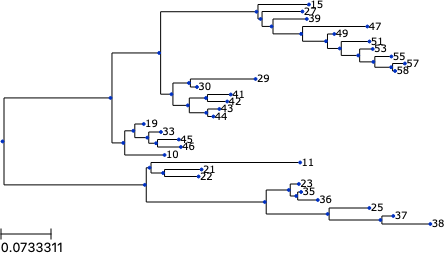

In [ ]:
# shorter terminal branches
length_scale=2
exp_rate=0.1
gamma=0
scale_factor=0
n_leaves = 30
simtree_exp = simevol.simulate_tree_with_depth_scaled_branch_lengths(n_leaves, scale_factor, 
                                                             length_scale=length_scale, exp_rate=exp_rate, 
                                                             shortleaves='exp_node_order_rate')
simtree_exp.render("%%inline", tree_style=ts)

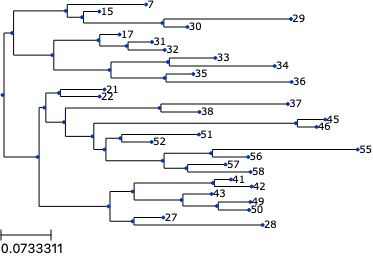

In [ ]:
#longer terminal branches
exp_rate=0.05
n_leaves = 30
scale_factor = 1  # Scale factor to reduce lengths with depth
length_scale=0.05
simtree_exp = simevol.simulate_tree_with_depth_scaled_branch_lengths(n_leaves, scale_factor, 
                                                             length_scale=length_scale, exp_rate=exp_rate, 
                                                             shortleaves='exp_node_order_rate_rev')
simtree_exp.render("%%inline", tree_style=ts)

## Correspondence of the modeled fraction of allowed states α to empirically measured dN/dS - Figure S12

/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/3338853591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)
/var/folders/nj/2tn6w9gs7b9fdn95zcp21t440000gp/T/ipykernel_89697/3338853591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cynall["Fraction of allowed substitutions"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=T

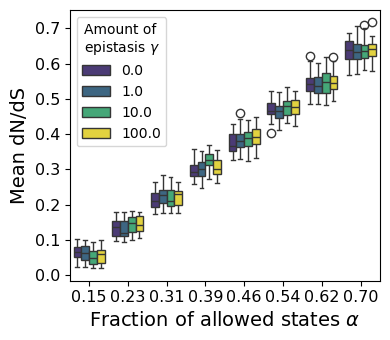

In [187]:
cynall=sdfr[(sdfr['run']=='normal branch lengths') ]

#bin f-values for boxplots
num_bins=8
cynall["fraction_allowed_subs_bin"], bin_edges = pd.cut(cynall["fraction_allowed_subs"], bins=num_bins, retbins=True)

# Create labels using min and max values
bin_labels = [f"{bin_edges[i+1]:.2f}" for i in range(len(bin_edges) - 1)]

# Assign bin labels
cynall["Fraction of allowed substitutions"] = pd.cut(cynall["fraction_allowed_subs"], bins=bin_edges, labels=bin_labels, include_lowest=True)
palette=['#fde725', '#35b779',  '#31688e', '#46327e']
palette.reverse()
pdict=dict(zip(cynall.gamma.unique(), palette))

fig, ax=plt.subplots( figsize=(4, 3.5))
sns.boxplot(cynall, y='dnds_mean_tree', x="Fraction of allowed substitutions", 
                hue='gamma', hue_norm=LogNorm(), palette=pdict, ax=ax
               )
ax.set_ylabel('Mean dN/dS', size=14)
ax.set_xlabel(r'Fraction of allowed states $\alpha$', size=14)
ax.legend(title='Amount of\nepistasis '+r'$\gamma$')
ax.tick_params(axis='both', which='major', labelsize=11.5)

fig.tight_layout()



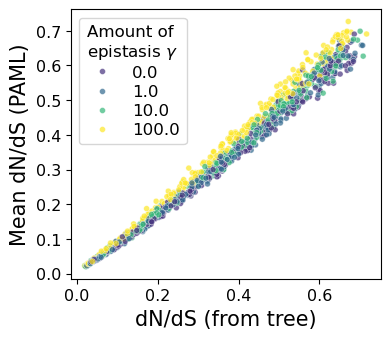

In [188]:
fig, ax=plt.subplots( figsize=(4, 3.5), )
sns.scatterplot(sdfr[(sdfr['run_readable']=='same')], y='dnds_mean', x='dnds_mean_tree', 
                 hue='gamma', s=18, alpha=0.7, ax=ax, palette=palette,)

ax.set_ylabel('Mean dN/dS (PAML)', size=15)
ax.set_xlabel(r'dN/dS (from tree)', size=15)
ax.legend(fontsize=12, title='Amount of\nepistasis '+r'$\gamma$', title_fontsize=12, labelspacing=0.25)
ax.tick_params(axis='both', which='major', labelsize=11.5)

## Summary statistics of the simulated dataset - Figure S13

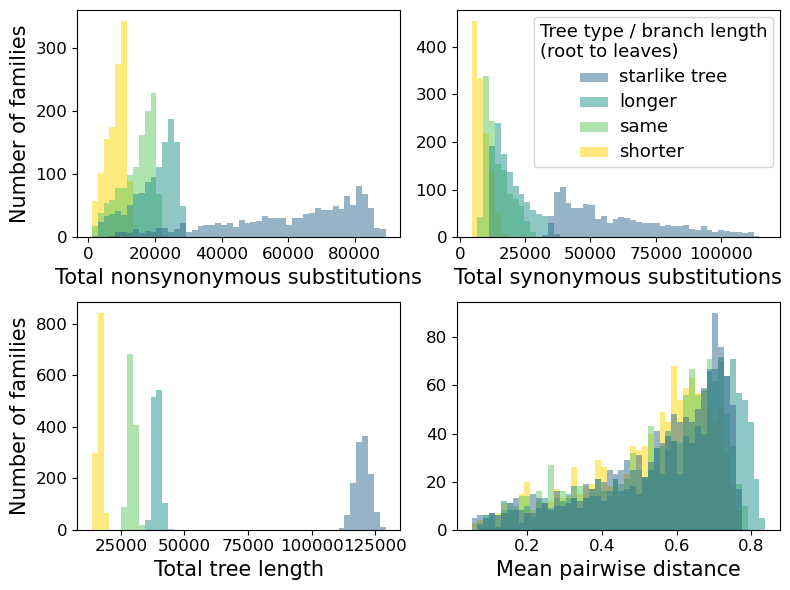

In [189]:
#look at distr of nonsyn counts and total tree length and pdistm 
rundict={'longleaves':'longer', 'normal branch lengths':'same','shortleaves':'shorter', 'notree':'starlike tree'}
run_compr=[]
for i in sdfr['run']:
    run_compr.append(rundict[i])
sdfr['run_readable']=run_compr

order = [
    "starlike tree",
    "longer",
    "same",
    "shorter"
]

xlab=dict(zip(['nonsyn_subs_count', 'syn_subs_count', 'total_treelength', 'mean_ld'], ['Total nonsynonymous substitutions', 'Total synonymous substitutions', 'Total tree length', 'Mean pairwise distance']))

# consistent colors per category

fig = plt.figure(figsize=(8, 6))
for ind, col in enumerate(['nonsyn_subs_count', 'syn_subs_count', 'total_treelength', 'mean_ld']):
    ax = fig.add_subplot(2, 2, ind + 1)

    # Let seaborn manage legend only on subplot ind==1
    sns.histplot(
        sdfr, x=col, hue='run_readable',
        bins=50, edgecolor='none',
        hue_order=order, palette=['#31688e',  '#21918c',  '#5ec962', 'gold', ],
        ax=ax, legend=(ind == 1)
    )

    if ind != 1:
        ax.legend([], [], frameon=False)
    else:
        # Try to use seaborn’s legend (if created)
        leg = ax.get_legend()
        if leg is not None and len(leg.get_texts()) > 0:
            leg.set_title('Tree type / branch length\n(root to leaves)')
            plt.setp(leg.get_title(), fontsize=13) 
            for text in leg.get_texts():
                text.set_fontsize(13)
        
    if ind%2==0:
        ax.set_ylabel('Number of families', size=15)
    else:
        ax.set_ylabel('')
    ax.set_xlabel(xlab[col], size=15)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

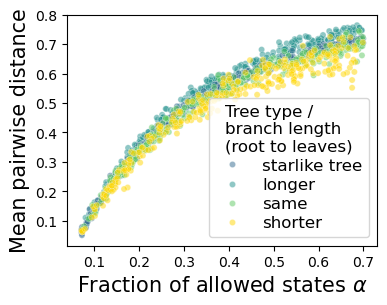

In [190]:
fig, ax=plt.subplots( figsize=(4, 3), )
sns.scatterplot(sdfr[(sdfr['gamma']==0)], y='mean_ld', x='fraction_allowed_subs', 
                 hue='run_readable', s=20, alpha=0.5, ax=ax, hue_order=order, palette=['#31688e',  '#21918c',  '#5ec962', 'gold', ],)

ax.set_ylabel('Mean pairwise distance', size=15)
ax.set_xlabel(r'Fraction of allowed states $\alpha$', size=15)
ax.legend(fontsize=12, title='Tree type /\nbranch length\n(root to leaves)', title_fontsize=12, labelspacing=0.25)

Text(0, 0.5, '# of trees (density)')

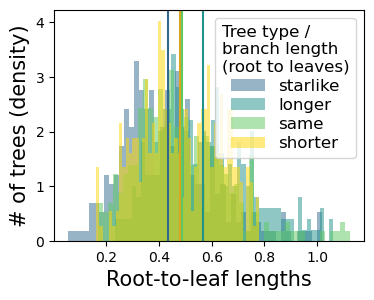

In [14]:


labels=['starlike', 'longer', 'same', 'shorter']
colors=['#31688e',  '#21918c',  '#5ec962', 'gold', ]
colorsline=colors[:-1]+['goldenrod']

lenscales=[0.7, 0.05, 1, 2.3]

exp_rates=[0.05349, 0.05, 0.05349, 0.1]
scale_factors=[0, 1, 0, 0]
starlike=[True, False, False, False]
shortleaves=['gammaFitAll','exp_node_order_rate_rev', None, 'exp_node_order_rate']

n_leaves = 300
allst=[]

fig, ax = plt.subplots(figsize=(4, 3))

for run in range(4):
    len_from_roots=[]
    nodedepths=[]
    total_length=[]
    for i in range(1000):
        len_from_root=[]
        nodedepth=[]
        simtree = simevol.simulate_tree_with_depth_scaled_branch_lengths(n_leaves, scale_factors[run], 
                                                                 length_scale=lenscales[run], exp_rate=exp_rates[run], 
                                                                 shortleaves=shortleaves[run], starlike=starlike[run])
        for i in simtree.traverse():
            if i.is_leaf():
                len_from_root.append(simtree.get_distance(i))
                nodedepth.append(simtree.get_distance(i, topology_only=True))
        total_length.append(sum(node.dist for node in simtree.traverse()))
        len_from_roots.extend(len_from_root)
        nodedepths.extend(nodedepth)
    allst.append([len_from_roots, nodedepths, total_length])

    ax.hist(len_from_root,  alpha=0.5, label=labels[run], density=True, bins=50, color=colors[run])
    ax.axvline(np.mean(len_from_root), label='', c=colorsline[run])

ax.legend(fontsize=12, title='Tree type /\nbranch length\n(root to leaves)', title_fontsize=12, labelspacing=0.25)
ax.set_xlabel('Root-to-leaf lengths', fontsize=15)
ax.set_ylabel('# of trees (density)', fontsize=15)